# A first glimpse into Neural Networks: Multi-Layer Perceptron (MLP)

In this first notebook, you will learn the basics of MLP with Keras. Before we can jump into Neural Networks, we need to take a look at the dataset, visualize it, analyze it, and prepare it so that it can be used to train a simple neural network.

## 1. Setting up the environment
The first code block simply imports packages we need to obtain, preprocess, and analyze the data. We import

- [NumPy](https://numpy.org/): standard numerical library, used for linear algebra, vector, matrix, and tensor manipulation.
- [Matplotlib](https://matplotlib.org/): 2D plotting library with a MATLAB-like interface.
- [scikit-learn](https://scikit-learn.org/stable/): Machine Learning library, for standard ML methods such as regressions, Support Vector Machines, Random Forests, ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. The data: Iris dataset
From [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set):

>The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

We will load the iris dataset from scikit-learn (we imported the function in the code block above). The dataset is organized like a [Python dictionary](https://docs.python.org/2/tutorial/datastructures.html#dictionaries), you can access the different features, if you know what they are called. Let us explore the dataset: we first load it, then print out the dictionary keys. Eventually, we print out the description, which we know is stored as `DESCR`. Some numbers in the description will be useful below, when we will check that the data is correct.

In [2]:
iris = load_iris()
print(iris.keys())

# Print the dataset description:
print(iris['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

Now, we need to extract the information we need, that is, assign parts of the dataset to our variables. Why doing so? At least for two reasons:

- Simplicity: we do not want to always reference a field of the `iris` variable.
- Consistency: we will often re-use the same names in our DL pipelines, but in the original datasets, different namings could have been chosen.

Thus, we want to have in a variable called `X` the real input *data* we are going to classify, in this case, for each sample, we will have the four attributes listed in the above description (`X` will thus be a matrix, every sample will be represented by a line, every column will represent a feature). `y` will always represent our ground truth (at least for labeled data): it is a vector assigning the correct label index to each sample.

We will also use two variables `names` and `feature_names`, to store the class name corresponding to the label indices used in `y` and the feature name corresponding to each column of `X`, respectively.

You only have to fill the matrix `X` and the vector `y`, in the next code block.

In [3]:
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

As you remember from the lecture, our NN will need a so-called one-hot-encoded vector representing the label of each sample. A one-hot-encoded vector is a vector where all components are `0` except for the component corresponding to the correct sample's label, which is set to `1`. There are many ways to turn `y` into the one-hot-encoded matrix `Y` (where each line will represent the one-hot-encoding of a sample's label. In the next code block, we use an object of type `OneHotEncoder` from `sklearn.preprocessing` which we imported above.

In [4]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

Time for a sanity check! We have two matrices, `X` and `Y`, can you predict what their shapes will be like? (hint: read the above description again if you can't!) 

We will call `n_features` the number of features measured for each sample, `n_samples` the number of samples, and `n_classes` the number of classes represented in our dataset. You should extract these numbers from `X` and `Y` (every NumPy array has an attribute called `shape`...) and check that they are in agreement with your prediction. Then, you should also make sure that `X` and `Y` have one dimension which is the same... can you guess which one, and introduce a check?

In [6]:
# TODO: assign the correct values to the next three variables!
n_features = X.shape[1]
n_classes = Y.shape[1]
n_samples = X.shape[0]

print("Number of features: {}".format(n_features))
print("Number of classes: {}".format(n_classes))
print("Number of samples: {}".format(n_samples))

# TODO: insert a check to ensure X and Y refer to the same number of samples
#       you can use a soft check (printing a warning if something is wrong)
#       or a hard check (using an assert of raising an error).
assert(n_samples == Y.shape[0])

Number of features: 4
Number of classes: 3
Number of samples: 150


## 3. Pre-processing the data
We now have some data, but NNs are a little picky about numbers. To have good convergence, all data should (at least) be scaled to have zero mean, and a variance of `1`. Fortunately, an object of type `StandardScaler` will make things easy for us.

We also want to split our (small) dataset equally into training and test portions. We use the built-in function `train_test_split` and are ready to visualize the data!

In [7]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=2)

## 4. Visualizing the data
The next code block uses `matplotlib` to give a visual feedback about the dataset. The desired result is simple: two plots, in the first one, input feature `1` is plotted agains input feature `0`, in the second one, input feature `3` is plotted agains input feature `2`.

The code takes care of separating the different classes when plotting, all you have to do is to fill in three annotations for each plot:

- class name as label of each set of points (replace "set 0", "set 1", and "set 2")
- feature name for x-axis label
- feature name for y-axis label

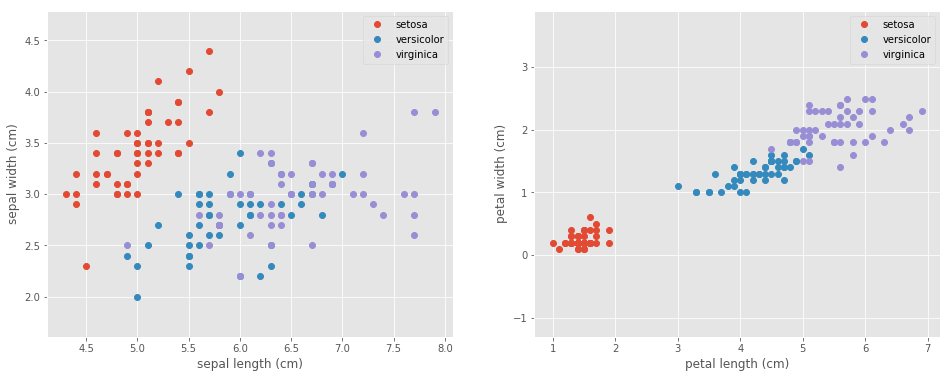

In [8]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    #TODO replace this label to match the class names!
    label_string = target_name # "set_{}".format(target)
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=label_string)
    
#TODO replace this label with the correct x-axis feature name!
plt.xlabel(feature_names[0])

#TODO replace this label with the correct y-axis feature name!
plt.ylabel(feature_names[1])

plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    label_sting = target_name # "set_{}".format(target)
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
    
#TODO replace this label with the correct x-axis feature name!
plt.xlabel(feature_names[2])
#TODO replace this label with the correct y-axis feature name!
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();


## 5. Applying Neural Networks to the problem

But... weren't we supposed to try out neural networks? Of course! But with the right toolkits, neural networks are easy to set up and run, once you have the data! We will now start with a simple (very simple) 2-layer perceptron!

In [Keras](https://keras.io), fully connected layers are represented by object of `Dense` type. An MLP is a simple network, thus we will build it as a `Sequential` model, and we only need to import two classes from the correct files. 

In [9]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


OK, time to create the Neural Network! We will call this NN `first_model`, and name it `iris_MLP`. We give you the input and the output layers, you will just have to:

- assign the correct value to the `nn_input_dim` variable, representing the size of *one* input sample (Keras will take care of adjusting the pipeline for the batch size)
- assign the correct value to the `nn_output_dim` variable, representing the size of *one* prediction (or output)
- create some hidden layers: use as many layers as you like, but don't overdo! Remember this is a fairly simple problem! You can even skip the hidden layers, if you like! Remember, for a `Sequential` model, you do not need to define input size for hidden layers, as it is automatically determined by Keras. You only specify the output size as `units`.

Notice that we are using `'relu'` as activation function. Feel free to explore other possibilities!

Once you defined your model (thus, after adding the output layer), you need to call `compile`, so that Keras can build the correct pipelines (feedforward and backpropagation) to train and use your model in inference mode. As we are dealing with labels, we use `'categorical_crossentropy'` as loss function. Then, we use a standard version of the Adam optimizer, and as metric we only want to see the classifier accuracy.

In [16]:
# TODO assign the right values to input and output sizes
nn_input_dim = n_features
nn_output_dim = n_classes

# Create model
first_model = Sequential(name="iris_MLP")

# You can use this size for all layers, or change it according to their position...
first_layer_output_size=8
first_model.add(Dense(units=first_layer_output_size, input_dim=nn_input_dim, activation='relu'))

#TODO add as many hidden layers as you wish
first_model.add(Dense(units=first_layer_output_size, activation='relu'))

first_model.add(Dense(nn_output_dim, activation='softmax'))

# Compile model: since we want to use the Adam optimizer with standard parameters
#                we do not instantiate a keras.models.optimizers.Adam object, instead
#                we only call it by its string name
first_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Print a nice description of the model!
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


Since we want to be able to train multiple models and compare their results, we create an array holding models and start by populating it with `first_model`.

In [17]:
models = [first_model]

In the next code block, you can define as many models as you like. You could even create them in a loop, modifying something at each iteration (number of nodes? layers? both?). Just remember to always compile them and `append` them to `models`! We start by adding a simple model with no hidden layers, but feel free to modify it!

In [18]:
second_model = Sequential(name="second")
second_model.add(Dense(8, input_dim=nn_input_dim, activation='relu'))
second_model.add(Dense(nn_output_dim, activation='softmax'))

second_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

models.append(second_model)

We want to store the training and validation accuracy (and loss) we get at training time. To do this, we create a Python dictionary linking each model to its training history (the `history_callback`).

In [19]:
history_dict = {}

Let's start the trainings! For each model we added to `models` we call the `fit` function. Fill the call with the right `x` and `y` variables (these should be the variables you want to train your model on). The rest of the call has already been filled for you (thank us later).

After the model has been trained, we compute and print out its accuracy on the test data.

For each training, check the output: we set `verbose=1`, so that Keras prints out updates after each batch. It reports loss and accuracy for both training and validation datasets. Compare the last value of `val_acc` and the value of `score[1]`, which we print as `Test accuracy`. What do you observe? Can you explain this?

In [23]:
batch_size = 5
epochs = 50

for model in models:
    print('Model name:', model.name)
    #TODO assign the right variables to x and y
    history_callback = model.fit(x=X_train, y=Y_train,
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 verbose=1,
                                 validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('\n')

    history_dict[model.name] = [history_callback, model]

Model name: iris_MLP
Train on 75 samples, validate on 75 samples
Epoch 1/50
75/75 [==============================] - 0s 683us/step - loss: 0.0741 - acc: 0.9600 - val_loss: 0.0915 - val_acc: 0.9467
Epoch 2/50
75/75 [==============================] - 0s 640us/step - loss: 0.0738 - acc: 0.9600 - val_loss: 0.0902 - val_acc: 0.9467
Epoch 3/50
75/75 [==============================] - 0s 637us/step - loss: 0.0734 - acc: 0.9600 - val_loss: 0.0908 - val_acc: 0.9467
Epoch 4/50
75/75 [==============================] - 0s 662us/step - loss: 0.0729 - acc: 0.9600 - val_loss: 0.0909 - val_acc: 0.9467
Epoch 5/50
75/75 [==============================] - 0s 686us/step - loss: 0.0738 - acc: 0.9600 - val_loss: 0.0962 - val_acc: 0.9467
Epoch 6/50
75/75 [==============================] - 0s 665us/step - loss: 0.0729 - acc: 0.9600 - val_loss: 0.0896 - val_acc: 0.9467
Epoch 7/50
75/75 [==============================] - 0s 644us/step - loss: 0.0736 - acc: 0.9600 - val_loss: 0.0946 - val_acc: 0.9467
Epoch 8/50


Now some more plotting! From the histories we stored, we access `'acc'`, `'loss'`, '`val_acc`', and `'val_loss'`. We create two plots, one for accuracy and one for loss, then we plot the learning curves of each model. What do you observe? 

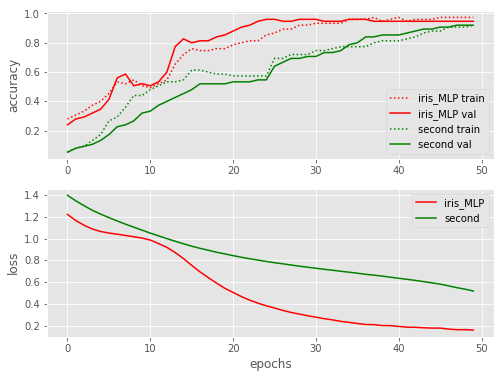

In [21]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

colorstring = "rgbcmk"

for i,model_name in enumerate(history_dict):
    train_acc = history_dict[model_name][0].history['acc']
    train_loss = history_dict[model_name][0].history['loss']
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(train_acc, colorstring[i]+':', label=model_name+" train")
    ax1.plot(val_acc, colorstring[i], label=model_name+" val")
    ax2.plot(val_loss, colorstring[i], label=model_name)
    
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()


Congratulations, you just built and trained your first Neural Networks! Now take some time to do some quick experiment, add more layers, more nodes, change the optimizer... [Keras docs](https://keras.io/) are your friends! What is the best accuracy you can get? How quick? You can also change batch size and number of epochs you want to train for... have fun! (Hint: you can suppress the training output by setting `verbose` to `0`)